### Final Project Requirements/notes: https://docs.google.com/document/d/1mwYbYJHkB7kpx4tNflKh54jN9_oOscw3p4k5fsmn3bc/edit

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [7]:
df = pd.read_csv('KLDivergence_for_DF.csv')
df.head()

,adsh,1,2,3,4,5,6,7,8,9,sum_of_first_digits,total_deviation,fraud
0,0000065984-18-000072,2474,1454,1038,900,680,592,476,444,398,8456,0.000339,0
1,0001628280-18-001324,2684,1580,1162,802,660,606,528,498,448,8968,0.000420,0
2,0001481792-18-000004,360,208,150,132,98,76,70,64,60,1218,0.000485,0
3,0001193125-18-066922,732,404,292,244,166,148,140,122,118,2366,0.000554,0
4,0001493152-18-003026,222,122,96,74,56,46,40,36,28,720,0.000589,0


In [8]:
df.describe(include = 'all')

,adsh,1,2,3,4,5,6,7,8,9,sum_of_first_digits,total_deviation,fraud
count,6113,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
unique,6113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0000897101-18-000080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,266.796663,154.998528,108.301652,83.120890,69.471291,56.706363,49.233437,42.747914,38.313103,869.689841,0.019296,0.019794
std,NaN,184.287043,107.004594,76.518797,59.684203,48.258418,41.725657,36.218550,31.925768,28.995206,589.354409,0.045632,0.139303
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000339,0.000000
25%,NaN,138.000000,80.000000,56.000000,42.000000,36.000000,28.000000,24.000000,20.000000,18.000000,458.000000,0.004921,0.000000
50%,NaN,242.000000,142.000000,98.000000,74.000000,62.000000,50.000000,44.000000,38.000000,34.000000,794.000000,0.008698,0.000000
75%,NaN,360.000000,208.000000,146.000000,114.000000,94.000000,78.000000,66.000000,58.000000,52.000000,1178.000000,0.016574,0.000000


In [9]:
df.isnull().sum()

adsh                   0
1                      0
2                      0
3                      0
4                      0
5                      0
6                      0
7                      0
8                      0
9                      0
sum_of_first_digits    0
total_deviation        0
fraud                  0
dtype: int64

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [11]:
df.columns

Index(['adsh', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       'sum_of_first_digits', 'total_deviation', 'fraud'],
      dtype='object')

In [12]:
X = df[['sum_of_first_digits', 'total_deviation']]
y = df.fraud
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
cluster_df = df[['sum_of_first_digits','fraud']]
cluster_df.head()

,sum_of_first_digits,fraud
0,8456,0
1,8968,0
2,1218,0
3,2366,0
4,720,0


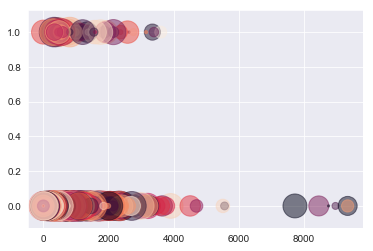

In [54]:
import seaborn as sns
N = 6113
x = cluster_df.sum_of_first_digits
y = cluster_df.fraud
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

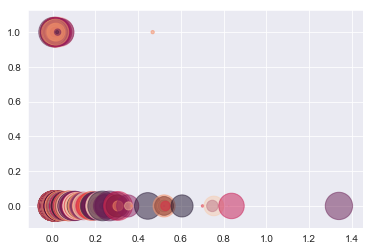

In [55]:
import seaborn as sns
N = 6113
x = df.total_deviation
y = df.fraud
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [13]:
print(y.value_counts())
print(y.value_counts(normalize=True))

0    5992
1     121
Name: fraud, dtype: int64
0    0.980206
1    0.019794
Name: fraud, dtype: float64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for None: 0.7057862679955703
LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for Balanced: 0.3609080841638981
LogisticRegression(C=1000000000000.0, class_weight={1: 2, 0: 1}, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for 2 to 1: 0.7178017718715395
LogisticRegression(C=1000000000000.0, class_weight

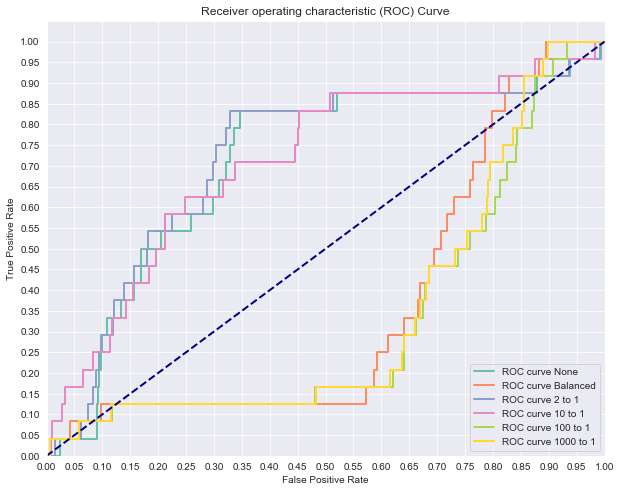

In [15]:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = 1e12, class_weight=weight) #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE, ADASYN

In [17]:
print(y.value_counts()) #Previous original class distribution
X_resampled, y_resampled = SMOTE().fit_sample(X, y) 
print(pd.Series(y_resampled).value_counts()) #Preview synthetic sample class distribution

0    5992
1     121
Name: fraud, dtype: int64
1    5992
0    5992
dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for None: 0.4812276051987151
LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for Balanced: 0.478652593204287
LogisticRegression(C=1000000000000.0, class_weight={1: 2, 0: 1}, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for 2 to 1: 0.46031717013538986
LogisticRegression(C=1000000000000.0, class_weight

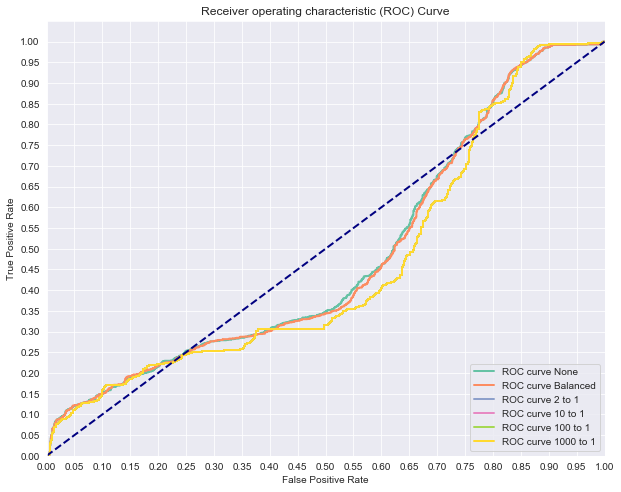

In [19]:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = 1e12, class_weight=weight) #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()